In [193]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
conn = sqlite3.connect("./database/movies_db_nj.sqlite")
cur = conn.cursor()

In [195]:
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_name_basics',),
 ('imdb_title_ratings',),
 ('bom_movie_gross',),
 ('imdb_title_basics',),
 ('rt_reviews',),
 ('imdb_title_akas',),
 ('tn_movies_budgets',),
 ('tmdb_movies',),
 ('rt_movies_info',)]

These are a series of SQL commands that get tables I need to explore that data and then join using panda using the merge() method.

In [196]:
# Joining and retrieving tmdb_movies and tn_movies_bugets tables
tm_df = pd.DataFrame(cur.execute('''SELECT *
                                 FROM tmdb_movies tm
                                 JOIN tn_movies_budgets tb
                                 ON tb.movie_title = title;'''))
tm_df.columns = [x[0] for x in cur.description]

In [199]:
tm_df.head(1)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,277289760,329870992


In [200]:
# retrieving imdb_title_basics table
tb_df = pd.DataFrame(cur.execute('''SELECT *
                                 FROM imdb_title_basics;'''))
tb_df.columns = [x[0] for x in cur.description]

In [201]:
tb_df.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [202]:
# retrieving imdb_title_ratings table
tr_df = pd.DataFrame(cur.execute('''SELECT *
                                 FROM imdb_title_ratings;'''))
tr_df.columns = [x[0] for x in cur.description]

In [203]:
tr_df.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


In [204]:
# retrieving imdb_title_principals
tp_df = pd.DataFrame(cur.execute('''SELECT *
                                 FROM imdb_title_principals;'''))
tp_df.columns = [x[0] for x in cur.description]

In [205]:
tp_df.head(1)

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor


In [206]:
# retrieving imdb_title_crew
tc_df = pd.DataFrame(cur.execute('''SELECT *
                                 FROM imdb_title_crew;'''))
tc_df.columns = [x[0] for x in cur.description]

In [207]:
tc_df.head(1)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854


In [208]:
# retrieving imdb_title_name_basics
nb_df = pd.DataFrame(cur.execute('''SELECT *
                                 FROM imdb_name_basics;'''))
nb_df.columns = [x[0] for x in cur.description]

In [209]:
nb_df.head(1)

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"


In [218]:
# retrieving imdb_title_akas
t_akas_df = pd.DataFrame(cur.execute('''SELECT *
                                 FROM imdb_title_akas;'''))
t_akas_df.columns = [x[0] for x in cur.description]

In [219]:
t_akas_df.head(1)

,title_id,ordering,title,region,is_original_title
0,tt0369610,10,Джурасик свят,BG,0.0


-

Merging the dataframes using pandas .merge() method on common columns

In [222]:
tb_tm_df = pd.merge(tb_df,tm_df, on='original_title')

In [223]:
tb_tm_df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_ids,id,original_language,popularity,...,title,vote_average,vote_count,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit
3620,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime","[18, 35, 28, 80]",506971,ur,4.486,...,Teefa in Trouble,7.6,11,2018-07-20,Teefa in Trouble,1500000,46257465,98806,-46158659,-1401194
3621,tt8083476,Chloe,Chloe,2017,6.0,"Documentary,Family","[18, 53, 9648]",28211,en,8.807,...,Chloe,5.9,940,2010-03-26,Chloe,13000000,3075255,11831131,8755876,-1168869
3622,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,[99],532908,en,10.003,...,Fahrenheit 11/9,7.1,142,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,301409,1653715
3623,tt8802728,The Witch,The Witch,2018,87.0,Horror,"[9648, 27]",310131,en,13.493,...,The Witch,6.6,2931,2016-02-19,The Witch,3500000,25138705,40454520,15315815,36954520
3624,tt9448858,The Magic Flute,The Magic Flute,2010,87.0,Music,"[10402, 35, 14]",313903,en,0.647,...,The Magic Flute,9.0,2,2006-12-31,The Magic Flute,27000000,46257465,97687996,51430531,70687996


In [224]:
tb_tm_tr_df = pd.merge(tb_tm_df, tr_df, on='tconst')

In [225]:
tb_tm_tr_df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_ids,id,original_language,popularity,...,vote_count,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,averagerating,numvotes
2736,tt7654872,Amoureux de ma femme,Amoureux de ma femme,2018,84.0,"Comedy,Drama,Romance","[18, 35, 10749]",499722,fr,6.359,...,60,2014-04-25,The Other Woman,40000000,83911193,195111193,111200000,155111193,5.3,735
2737,tt7766254,Big,Big,2017,99.0,Documentary,"[14, 18, 35, 10749, 10751]",2280,en,15.031,...,1813,1988-06-03,Big,18000000,114968774,151668774,36700000,133668774,8.5,6
2738,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery","[27, 9648, 53]",493922,en,26.185,...,2491,2018-06-08,Hereditary,10000000,44069456,70133905,26064449,60133905,7.3,151571
2739,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime","[18, 35, 28, 80]",506971,ur,4.486,...,11,2018-07-20,Teefa in Trouble,1500000,46257465,98806,-46158659,-1401194,7.4,2724
2740,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,[99],532908,en,10.003,...,142,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,301409,1653715,6.7,11628


In [226]:
# adding a 'total_regions' column to look at how many regions each moview has been released in.
tb_tm_tr_df.insert(2,'total_regions', 0)

In [227]:
tb_tm_tr_df.head(10)

,tconst,primary_title,total_regions,original_title,start_year,runtime_minutes,genres,genre_ids,id,original_language,...,vote_count,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,averagerating,numvotes
0,tt0249516,Foodfight!,0,Foodfight!,2012,91.0,"Action,Animation,Comedy","[16, 28, 35, 10751]",116977,en,...,46,2012-12-31,Foodfight!,45000000,46257465,73706,-46183759,-44926294,1.9,8248
1,tt0337692,On the Road,0,On the Road,2012,124.0,"Adventure,Drama,Romance","[12, 18]",83770,en,...,518,2013-03-22,On the Road,25000000,720828,9313302,8592474,-15686698,6.1,37886
2,tt4339118,On the Road,0,On the Road,2014,89.0,Drama,"[12, 18]",83770,en,...,518,2013-03-22,On the Road,25000000,720828,9313302,8592474,-15686698,6.0,6
3,tt5647250,On the Road,0,On the Road,2016,121.0,Drama,"[12, 18]",83770,en,...,518,2013-03-22,On the Road,25000000,720828,9313302,8592474,-15686698,5.7,127
4,tt0359950,The Secret Life of Walter Mitty,0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama","[12, 35, 18, 14]",116745,en,...,4859,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,129624345,96861183,7.3,275300
5,tt0365907,A Walk Among the Tombstones,0,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama","[80, 18, 9648, 53]",169917,en,...,1685,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,36090902,34108587,6.5,105116
6,tt0369610,Jurassic World,0,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi","[28, 12, 878, 53]",135397,en,...,14056,2015-06-12,Jurassic World,215000000,652270625,1648854864,996584239,1433854864,7.0,539338
7,tt0376136,The Rum Diary,0,The Rum Diary,2011,119.0,"Comedy,Drama","[18, 35]",23514,en,...,652,2011-10-28,The Rum Diary,45000000,13109815,21544732,8434917,-23455268,6.2,94787
8,tt0383010,The Three Stooges,0,The Three Stooges,2012,92.0,"Comedy,Family",[35],76489,en,...,215,2012-04-13,The Three Stooges,30000000,44338224,54052249,9714025,24052249,5.1,28570
9,tt0393049,Anderson's Cross,0,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance","[10749, 35, 18]",324352,en,...,1,2010-12-31,Anderson's Cross,300000,46257465,97687996,51430531,97387996,5.5,106


In [228]:
# this loop calculates the total regions a title has been released in and adds to the 'total_regions' column

for row, title in enumerate(tb_tm_tr_df['tconst']):
    try:
        tb_tm_tr_df.loc[row,'total_regions'] =  len(t_akas_df.loc[t_akas_df['title_id']==str(title)])
    except:
        continue


In [249]:
tb_tm_tr_df.head()

,tconst,primary_title,total_regions,original_title,start_year,runtime_minutes,genres,genre_ids,id,original_language,...,vote_count,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,averagerating,numvotes
0,tt0249516,Foodfight!,11,Foodfight!,2012,91.0,"Action,Animation,Comedy","[16, 28, 35, 10751]",116977,en,...,46,2012-12-31,Foodfight!,45000000,46257465,73706,-46183759,-44926294,1.9,8248
1,tt0337692,On the Road,28,On the Road,2012,124.0,"Adventure,Drama,Romance","[12, 18]",83770,en,...,518,2013-03-22,On the Road,25000000,720828,9313302,8592474,-15686698,6.1,37886
2,tt4339118,On the Road,2,On the Road,2014,89.0,Drama,"[12, 18]",83770,en,...,518,2013-03-22,On the Road,25000000,720828,9313302,8592474,-15686698,6.0,6
3,tt5647250,On the Road,3,On the Road,2016,121.0,Drama,"[12, 18]",83770,en,...,518,2013-03-22,On the Road,25000000,720828,9313302,8592474,-15686698,5.7,127
4,tt0359950,The Secret Life of Walter Mitty,33,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama","[12, 35, 18, 14]",116745,en,...,4859,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,129624345,96861183,7.3,275300


In [291]:
regions_profit_df = tb_tm_tr_df[['total_regions', 'profit']]

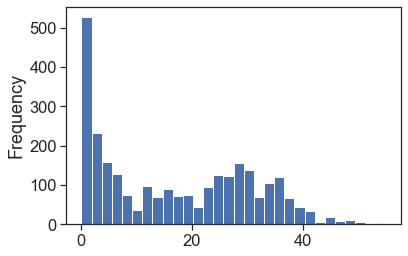

In [292]:
regions_profit_df['total_regions'].plot(x='Num of regions', y= 'frequency', kind='hist', bins=30)
#distribution of regions

In [293]:
import seaborn as sns

In [294]:
tb_tm_tr_df['total_regions'].describe()

count    2741.000000
mean       16.874863
std        13.596748
min         0.000000
25%         3.000000
50%        16.000000
75%        29.000000
max        55.000000
Name: total_regions, dtype: float64

In [322]:
# distribution of the regions
#regions_plot = sns.distplot(regions_profit_df['total_regions'], bins=30)

In [296]:
regions_df = regions_profit_df['total_regions']
regions_iqr = regions_profit_df['total_regions'][regions_profit_df['total_regions'].between(regions_profit_df['total_regions'].quantile(.25), regions_profit_df['total_regions'].quantile(.75), inclusive=True)]

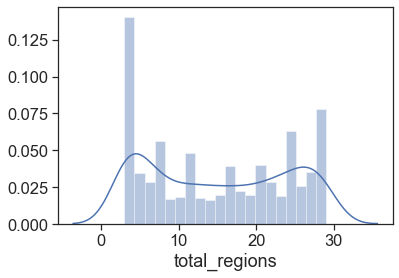

In [297]:
regions_iqr_plot = sns.distplot(regions_iqr, bins=20)

In [323]:
regions_profit_df['profit'].describe()

count    2.741000e+03
mean     8.407152e+07
std      1.638305e+08
min     -1.104502e+08
25%     -4.780380e+05
50%      3.162382e+07
75%      9.568800e+07
max      1.748134e+09
Name: profit, dtype: float64

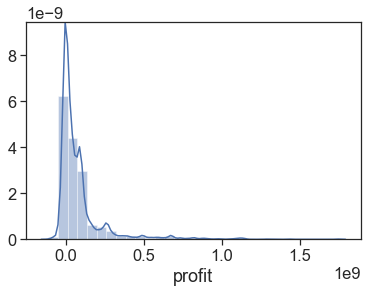

In [326]:
# distribution of the profit
# most movies are on the low end of the profits.
profit_plot1 = sns.distplot(regions_profit_df['profit'], bins=30)

In [327]:
profit_iqr = regions_profit_df['profit'][regions_profit_df['profit'].between(regions_profit_df['profit'].quantile(.25), regions_profit_df['profit'].quantile(.75), inclusive=True)]

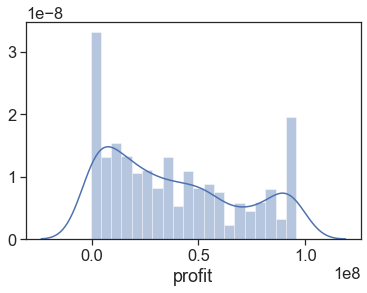

In [328]:
profit_iqr_plot = sns.distplot(profit_iqr, bins=20)

In [329]:
#selecting regions and worldwide gross information from combined df and assigning it to regions_profit_df

regions_profit_df = tb_tm_tr_df.iloc[:, [2,21]]
regions_profit_df.set_index('total_regions')

#checking how the values are distribured
regions_profit_df['total_regions'].value_counts(normalize=True)

#  17% of movies released in just one region

1     0.174024
3     0.070047
4     0.032470
29    0.031011
25    0.027362
35    0.026997
30    0.026633
28    0.025903
7     0.025903
27    0.025903
32    0.025173
5     0.025173
31    0.024079
22    0.020795
33    0.020795
6     0.020795
12    0.020430
26    0.018971
24    0.018606
16    0.018606
0     0.018242
34    0.017877
36    0.017147
21    0.016417
18    0.016417
8     0.014958
11    0.014958
2     0.014593
15    0.014593
19    0.014228
23    0.013864
10    0.013499
13    0.013134
20    0.012769
38    0.012404
9     0.012404
37    0.012404
14    0.012039
17    0.010215
39    0.010215
41    0.008756
40    0.005837
42    0.003648
45    0.003283
44    0.003283
43    0.002189
48    0.002189
46    0.002189
49    0.001824
51    0.001459
47    0.001094
52    0.000730
53    0.000730
50    0.000365
55    0.000365
Name: total_regions, dtype: float64

In [334]:
#Looking at what the stats are regions and profit
print(regions_profit_df['profit'].describe(), '\n\n')
print(regions_profit_df['total_regions'].describe())

count    2.741000e+03
mean     8.407152e+07
std      1.638305e+08
min     -1.104502e+08
25%     -4.780380e+05
50%      3.162382e+07
75%      9.568800e+07
max      1.748134e+09
Name: profit, dtype: float64 


count    2741.000000
mean       16.874863
std        13.596748
min         0.000000
25%         3.000000
50%        16.000000
75%        29.000000
max        55.000000
Name: total_regions, dtype: float64


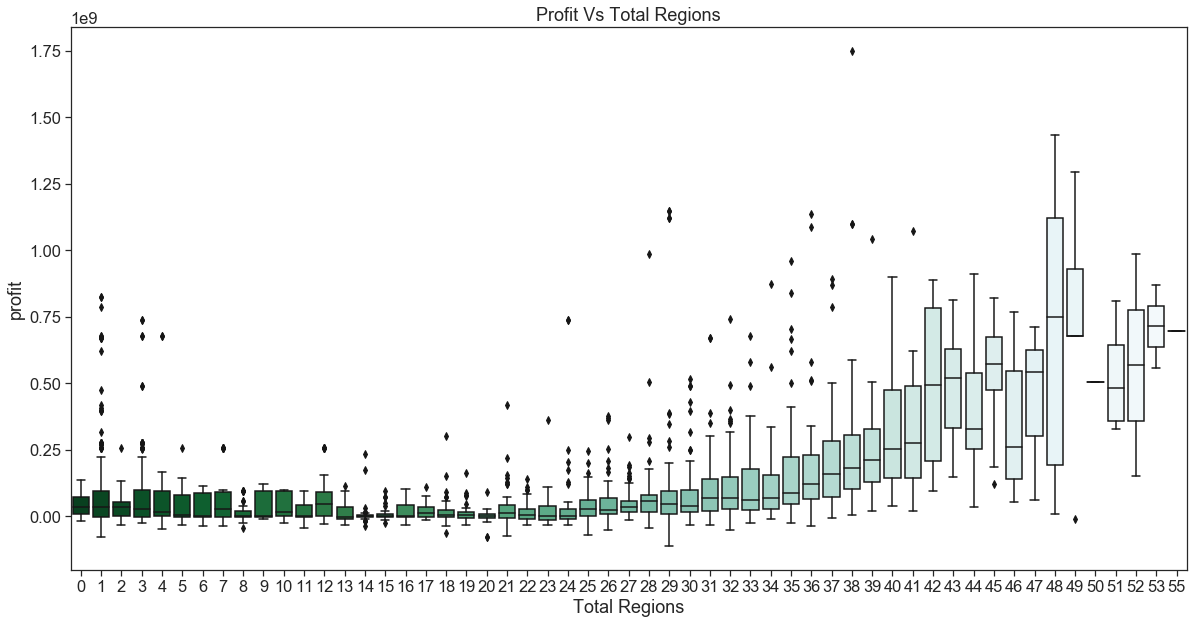

In [335]:
#Plotting boxplot of profit vs regions to see what the relationship is.
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,1,1)
plt.rcParams["axes.labelsize"] = 18

chart1 = sns.boxplot(x= 'total_regions', y = 'profit', palette='BuGn_r', data=regions_profit_df).set(xlabel='Total Regions', ylabel='profit', title='Profit Vs Total Regions')


When total number of regions is higher the potential to make a large profit is high but at the same time the risk of loss is also high. This is seen on the chart by the seeing the wide range in profit for the higher total regions.